project done by mauzum shamil

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,BatchNormalization
from PIL import Image

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import os


In [3]:
encoder = OneHotEncoder()
encoder.fit([[1],[0]])

# 1 = helmet is detected #
# 0 = helmet is not detected #

OneHotEncoder()

# importing images 

In [6]:
# helmet 

paths =[]
data =[]
result =[]

for r,d,f in os.walk(r"C:\Users\dell\Desktop\helmet detection\with helmet"):
    for file in f:
        if '.jpg' or '.jpeg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [8]:
# no helmet

paths = []

for r,d,f in os.walk(r"C:\Users\dell\Desktop\helmet detection\without helmet"):
    for file in f:
        if '.jpg' or '.jpeg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

# changing to array

In [28]:
data = np.array(data)
data.shape

(1994, 128, 128, 3)

In [29]:
result = np.array(result)
result.shape
result = result.reshape(1994,2)

# visualization

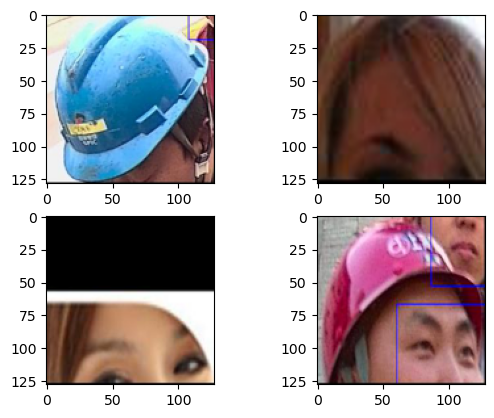

In [30]:
plt.subplot(2,2,1)
plt.imshow(data[200])
plt.subplot(2,2,2)
plt.imshow(data[1500])
plt.subplot(2,2,3)
plt.imshow(data[1300])
plt.subplot(2,2,4)
plt.imshow(data[400])

# training and testing

In [31]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.2,shuffle=True,random_state=0)

# model building

In [32]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(2,2),input_shape = (128,128,3),padding='Same'))
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.45))

model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Conv2D(62,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.45))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))

print(model.summary())

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 62)     │        15,934 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64, 64, 62)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 62)     │           248 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 62)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32, 32, 62)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 63488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    32,506,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,536,504 (124.12 MB)

 Trainable params: 32,536,316 (124.12 MB)

 Non-trainable params: 188 (752.00 B)

None


# compile

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [34]:
x_train.shape

(1595, 128, 128, 3)

In [35]:
y_train.shape

(1595, 2)

# model fitting

In [36]:
history = model.fit(x_train,y_train,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8601 - loss: 6.5310
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9820 - loss: 1.3974
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9888 - loss: 0.3103
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9947 - loss: 0.0569
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9967 - loss: 0.0654
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9979 - loss: 0.0368
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9979 - loss: 0.0457
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9960 - loss: 0.0710
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9960 - loss: 0.1483
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9996 - loss: 0.0061


# performance analysis

In [37]:
scores = model.evaluate(x_test,y_test,batch_size=64)
print("test accuracy : %0.2f%%" % (100 * scores[1]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.8809 - loss: 5.6662
test accuracy : 87.72%


# conclusion

In [42]:
def names(number):
    if number==1:
        return 'helmet is detected'
    else:
        return 'helmet is not detected'

helmet is detected


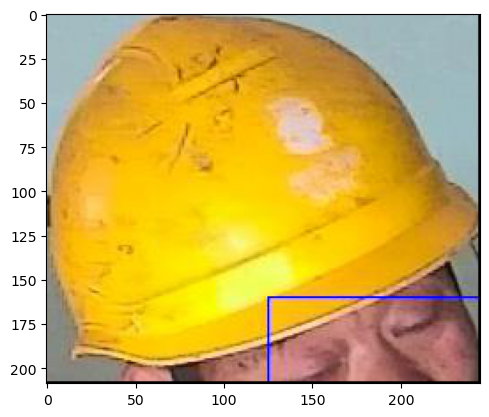

In [45]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\helmet detection\with helmet\out_put6996.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))

helmet is not detected


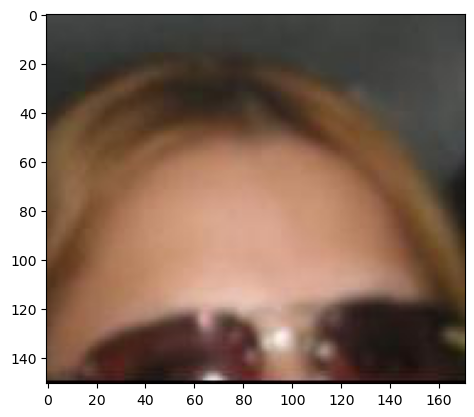

In [46]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\helmet detection\without helmet\out_put_16609.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))

helmet is detected


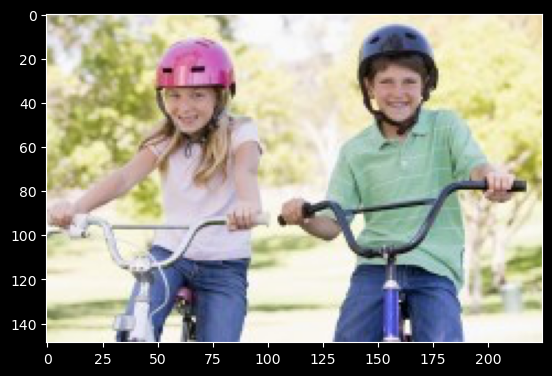

In [50]:
# let us try a image from google

from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\images\BikesHelmets755.png")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))

helmet is not detected


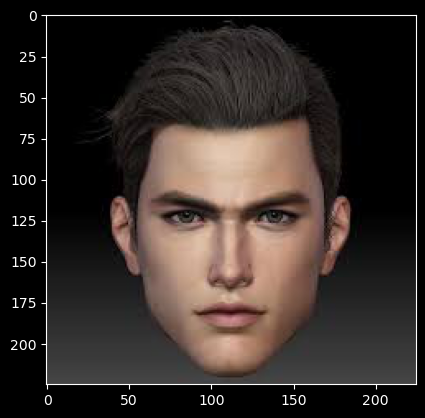

In [52]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Downloads\h.jpeg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))